# Environment

In [1]:
#%pylab qt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


아래 링크에서 texture3 repo / cloning 및 설치 필요
https://github.com/youngung/texture3

In [2]:
from mpl_toolkits.mplot3d import axes3d
from TX import sym, euler ## texture3 download(혹은 clone) 및 설치 필요

In [3]:
def draw_unit(
    ax=None,
    m2v=np.identity(3),
    kws=dict(ls='-',c='orange',marker='None',alpha=0.5),linewidth=0.3):
  
    orig=np.array([0.5,0.5,0.5])

    o=np.dot(np.array([0,0,0]-orig),m2v)
    a=np.dot(np.array([1,0,0]-orig),m2v)
    b=np.dot(np.array([0,1,0]-orig),m2v)
    c=np.dot(np.array([0,0,1]-orig),m2v)
    d=np.dot(np.array([1,0,1]-orig),m2v)
    e=np.dot(np.array([0,1,1]-orig),m2v)
    f=np.dot(np.array([1,1,0]-orig),m2v)
    g=np.dot(np.array([1,1,1]-orig),m2v)

    if type(ax)==type(None):
        fig=plt.figure()
        ax1=fig.add_subplot(projection='3d')    
    else:
        ax1=ax

    dat=np.array([o,a]).T
    ax1.plot(*dat,**kws)
    dat=np.array([o,b]).T
    ax1.plot(*dat,**kws)
    dat=np.array([o,c]).T
    ax1.plot(*dat,**kws)
    dat=np.array([a,d]).T
    ax1.plot(*dat,**kws)
    dat=np.array([b,e]).T
    ax1.plot(*dat,**kws)
    dat=np.array([c,e]).T
    ax1.plot(*dat,**kws)
    dat=np.array([c,d]).T
    ax1.plot(*dat,**kws)
    dat=np.array([a,f]).T
    ax1.plot(*dat,**kws)
    dat=np.array([b,f]).T
    ax1.plot(*dat,**kws)
    dat=np.array([g,f]).T
    ax1.plot(*dat,**kws)
    dat=np.array([g,d]).T
    ax1.plot(*dat,**kws)
    dat=np.array([g,e]).T
    ax1.plot(*dat,**kws)

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    
    ax1.set_xticks([-1,0,1])
    ax1.set_yticks([-1,0,1])
    ax1.set_zticks([-1,0,1]) 

In [4]:
def miller2vec(icrysym,isn,cvec,trans=np.identity(3)):
    if icrysym==2 or icrysym==3: ## hexagonal or trigonal
        isn[2]=isn[3]
        isb[0]=isb[0]-isb[2]
        isb[1]=isb[1]-isb[2]
        isb[2]=isb[3]
    sn=np.zeros(3)
    sn[2]= isn[2]/cvec[2,2]
    sn[0]=[isn[0]-cvec[2,0]*sn[2]]/cvec[0,0]
    sn[1]=[isn[1]-cvec[0,1]*sn[0]-cvec[2,1]*sn[2]]/cvec[1,1]
    sn_mag=sqrt((sn**2).sum())
    sn=sn/sn_mag
    sn=np.dot(sn,trans)
    return sn

def deco(axs):
    ax,ax1,ax2=axs[:]

    ## half-(north)sphere surface
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi/2.:200j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax1.plot_surface(x, y, z, color="k",alpha=0.1)

    ## full sphere surface
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color="k",alpha=0.1)    
    
    ## for ax1, upper hemisphere
    ## for ax, full hemisphere

    th=np.linspace(-np.pi,np.pi,100)
    X=cos(th);Y=sin(th)
    ax1.plot(X,Y,'k-')
    ax.plot(X,Y,'k-')    

    ## x, y ticks
    for a in axs:
        a.plot([0.95,1.05],[0,0],'m-')
        a.plot([0.0,0.0],[0.95,1.05],'b-')    

    ax2.plot(X,Y,'k-')
    ax2.set_axis_off()
    ax2.set_aspect('equal')

## Euler angles to transformation matrix

- Let's define the Euler angles (Z,X,Z)

In [5]:
"""
        1: CUBIC                                                                                                                                                                                                                                                                               
        2: HEXAGONAL                                                                                                                                                                                                                                                                           
        3: TRIGONAL                                                                                                                                                                                                                                                                            
        4: TETRAGONAL                                                                                                                                                                                                                                                                          
        5: ORTHORHOMBIC                                                                                                                                                                                                                                                                        
        6: MONOCLINIC                                                                                                                                                                                                                                                                          
        7: TRICLINIC   """


'\n        1: CUBIC                                                                                                                                                                                                                                                                               \n        2: HEXAGONAL                                                                                                                                                                                                                                                                           \n        3: TRIGONAL                                                                                                                                                                                                                                                                            \n        4: TETRAGONAL                                                                                                             

In [6]:
def main(icrysym=1,
         isn=[1,1,0],
         phi1=-20.,
         phi=15.,
         phi2=30.,
         cdim=[0.2,0.2,0.2],
         cang=[90,90,90],elev=0.,azim=0.):


    ## figure canvas
    #if ioff: plt.ioff()
    fig=plt.figure(figsize=(12,3.4))
    ax1=fig.add_subplot(131,projection='3d')  
    ax2=fig.add_subplot(132,projection='3d')  
    ax3=fig.add_subplot(133)
    ## draw crystal unit cell

    ## generate transformation matrix.
    trans=euler.euler(phi1,phi,phi2,echo=False)
    cvec=sym.cvec(cdim=cdim,cang=cang)
    cvec_=np.dot(cvec,trans)
    for ax in fig.axes[0:1]:
        draw_unit(ax,m2v=cvec_)

    # crystal plane miller index
    
    if icrysym==1:
        hs=sym.cubic()
    else:
        hs=np.array([np.identity(3)])

    mir=np.zeros((3,3))
    for i in range(3):
        mir[i,i]=-1

    ## point mirrors
    hs_=np.zeros((hs.shape[0]*2,3,3))
    for i in range(hs.shape[0]):
        hs_[2*i,:,:]=hs[i,:,:]
        hs_[2*i+1,:,:]=matmul(hs[i,:,:],mir)
    hs=hs_.copy()

    south=np.array([0,0,-1])
    sn_init=miller2vec(icrysym,isn,cvec)
    for i in range(hs.shape[0]):
        h=hs[i,:,:]
        sn=np.dot(h,sn_init)
        sn=np.dot(sn,trans)
        o=np.array([0,0,0])
        d=np.array([o,sn]).T

        if sn[2]>=0:
            for ax in fig.axes[:2]:
                ax.plot([sn[0]],[sn[1]],[sn[2]],'o',c='r',mfc='None')
            ax1.plot(*d,c='lightgreen',alpha=1,lw=0.2,zorder=-100)          

            ## line connecting south pole to vector points projected on the sphere.        
            d=np.array([sn,south]).T
            ax2.plot(*d,'--',c='k',alpha=0.5,lw=0.2)

            ## stereographic projection
            X,Y=sn[0]/(1+sn[2]),sn[1]/(1+sn[2]) # northsphere to proejct
            kwd=dict(mfc='g',marker='o',mec='None')
            ax2.plot([X],[Y],[0],**kwd)
        
            ax3.plot(X,Y,**kwd)
            if i==0:ax3.text(X,Y,isn.__str__(),va='center',ha='left')
        else:
            ax1.plot(*d,c='lightgreen',alpha=1,lw=1)
            ax1.plot([sn[0]],[sn[1]],[sn[2]],'o',c='r',mfc='None')      

    
    ax1.plot([south[0]],[south[1]],[south[2]],'k.')
    ax2.plot([south[0]],[south[1]],[south[2]],'k.')
    ax1.text(*south,'south pole',ha='left',va='top')
    for ax in fig.axes[:2]:
        ax.text(1,0,0,'X-axis',c='m',ha='left',va='top')
        ax.text(0,1,0,'Y-axis',c='b',ha='left',va='bottom')
    ax3.text(1,0,'X-axis',c='m',ha='left',va='center')
    ax3.text(0,1,'Y-axis',c='b',ha='center',va='bottom')

    for ax in fig.axes[:2]:
        ax.view_init(elev=elev, azim=azim)
    
    ax1.set_axis_off()
    ax2.set_axis_off()
    ## deco
    deco(fig.axes)
    return fig #fig.savefig('/tmp/pf_stereoprojection.png',dpi=500,transparent=True)

In [7]:
%%time
!rm -rvf /tmp/pf_tmp*.png
k=0
phi1=45
phi2=30
phi=20
#azim=0
elev=30
for i in range(elev,40,5): ## elev
    elev=elev+i 
    for j in range(0,360,5): ## azim
        azim=j    
        fig=main(elev=i,azim=j,phi1=phi1,phi=phi,phi2=phi2)
        k=k+1
        fig.savefig('/tmp/pf_tmp_%4.4i.png'%k,dpi=200)
        fig.clf()
        plt.close(fig)
        
for i in range(phi1,phi1+360,1):
        fig=main(elev=elev,azim=azim,phi1=phi1,phi=phi,phi2=phi2)
        k=k+1
        fig.savefig('/tmp/pf_tmpx_%4.4i.png'%k,dpi=200)
        fig.clf()
        plt.close(fig)

zsh:1: no matches found: /tmp/pf_tmp*.png
CPU times: user 2h 44min 45s, sys: 2h 27min 28s, total: 5h 12min 14s
Wall time: 58min 6s


In [8]:
!ffmpeg -y -r 10 -f image2 -i /tmp/pf_tmp_%04d.png -vcodec libx264 -crf 25 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p pf_illustration.mp4    
!open pf_illustration.mp4

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disab

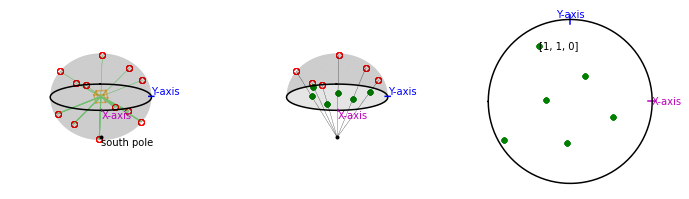

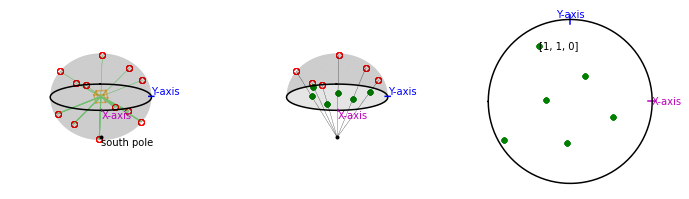

In [9]:
main(elev=elev,azim=azim,phi1=45)

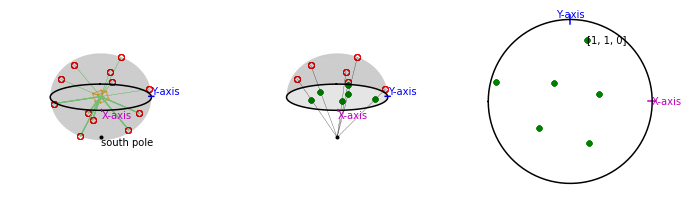

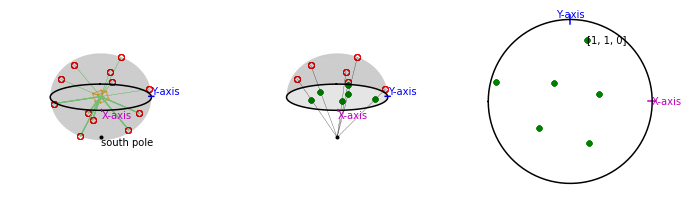

In [10]:
main(elev=elev,azim=azim,phi1=0)

In [11]:
!rm -vfr /tmp/pf_tmpx_*.png
poles=[1,0,0]
phi1=0
phi=45.
phi2=30.
k=0
elev=30.
azim=30.
for i in range(phi1,phi1+360,5):
        fig=main(elev=elev,azim=azim,phi1=i,phi=phi,phi2=phi2)
        fig.savefig('/tmp/pf_tmpx_%4.4i.png'%k,dpi=200)
        k=k+1
        fig.clf()
        plt.close(fig)

/tmp/pf_tmpx_3601.png
/tmp/pf_tmpx_3602.png
/tmp/pf_tmpx_3603.png
/tmp/pf_tmpx_3604.png
/tmp/pf_tmpx_3605.png
/tmp/pf_tmpx_3606.png
/tmp/pf_tmpx_3607.png
/tmp/pf_tmpx_3608.png
/tmp/pf_tmpx_3609.png
/tmp/pf_tmpx_3610.png
/tmp/pf_tmpx_3611.png
/tmp/pf_tmpx_3612.png
/tmp/pf_tmpx_3613.png
/tmp/pf_tmpx_3614.png
/tmp/pf_tmpx_3615.png
/tmp/pf_tmpx_3616.png
/tmp/pf_tmpx_3617.png
/tmp/pf_tmpx_3618.png
/tmp/pf_tmpx_3619.png
/tmp/pf_tmpx_3620.png
/tmp/pf_tmpx_3621.png
/tmp/pf_tmpx_3622.png
/tmp/pf_tmpx_3623.png
/tmp/pf_tmpx_3624.png
/tmp/pf_tmpx_3625.png
/tmp/pf_tmpx_3626.png
/tmp/pf_tmpx_3627.png
/tmp/pf_tmpx_3628.png
/tmp/pf_tmpx_3629.png
/tmp/pf_tmpx_3630.png
/tmp/pf_tmpx_3631.png
/tmp/pf_tmpx_3632.png
/tmp/pf_tmpx_3633.png
/tmp/pf_tmpx_3634.png
/tmp/pf_tmpx_3635.png
/tmp/pf_tmpx_3636.png
/tmp/pf_tmpx_3637.png
/tmp/pf_tmpx_3638.png
/tmp/pf_tmpx_3639.png
/tmp/pf_tmpx_3640.png
/tmp/pf_tmpx_3641.png
/tmp/pf_tmpx_3642.png
/tmp/pf_tmpx_3643.png
/tmp/pf_tmpx_3644.png
/tmp/pf_tmpx_3645.png
/tmp/pf_tm

In [12]:
!ffmpeg -y -r 10 -f image2 -i /tmp/pf_tmpx_%04d.png -vcodec libx264 -crf 25 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p pf_illustrationx.mp4    

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disab

In [13]:
!open pf_illustrationx.mp4

In [14]:
!rm -vfr /tmp/pf_tmpx_phi_100_*.png
isn=[1,0,0]
phi=0
k=0
for i in range(phi,phi+180,5):
        fig=main(isn=isn,elev=elev,azim=azim,phi1=phi,phi=i,phi2=phi2)
        fig.savefig('/tmp/pf_tmpx_phi_100_%4.4i.png'%k,dpi=200)
        k=k+1
        fig.clf()
        plt.close(fig)

zsh:1: no matches found: /tmp/pf_tmpx_phi_100_*.png


In [15]:
!ffmpeg -y -r 10 -f image2 -i /tmp/pf_tmpx_phi_100_%04d.png -vcodec libx264 -crf 25 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p pf_illustration_100_phi.mp4    

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disab

In [16]:
ls *.mp4

pf_illustration.mp4          pf_illustrationx.mp4
pf_illustration_100_phi.mp4


In [17]:
!open pf_illustration_100_phi.mp4

In [18]:
!cp -v pf_illustration_100_phi.mp4 /Users/youngung/Library/CloudStorage/GoogleDrive-yjeong@gs.cwnu.ac.kr/My Drive/lectures/2023-Lecture-대학원/

cp: Drive/lectures/2023-Lecture-대학원 is not a directory


In [19]:
!cp -v pf_illustrationx.mp4 /Users/youngung/Library/CloudStorage/GoogleDrive-yjeong@gs.cwnu.ac.kr/My Drive/lectures/2023-Lecture-대학원/

cp: Drive/lectures/2023-Lecture-대학원 is not a directory


In [20]:
!cp -v pf_illustration.mp4 /Users/youngung/Library/CloudStorage/GoogleDrive-yjeong@gs.cwnu.ac.kr/My Drive/lectures/2023-Lecture-대학원/

cp: Drive/lectures/2023-Lecture-대학원 is not a directory
